<a href="https://colab.research.google.com/github/Belac44/Tuberculosis-Prediction-Deployment/blob/main/Tuberclosis_model__(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras
import os
import matplotlib.pyplot as plt
import numpy as np
import pathlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_height,img_width=96,96
batch_size=16
train_ds=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TuberClosis_X_ray_images/train',
    image_size=(img_height,img_width),
    batch_size=batch_size
    
)

valid_ds=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TuberClosis_X_ray_images/validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
    
)
  
test_ds=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TuberClosis_X_ray_images/test',
    image_size=(img_height,img_width),
    batch_size=batch_size
    
)



Found 1314 files belonging to 3 classes.
Found 309 files belonging to 3 classes.
Found 109 files belonging to 3 classes.


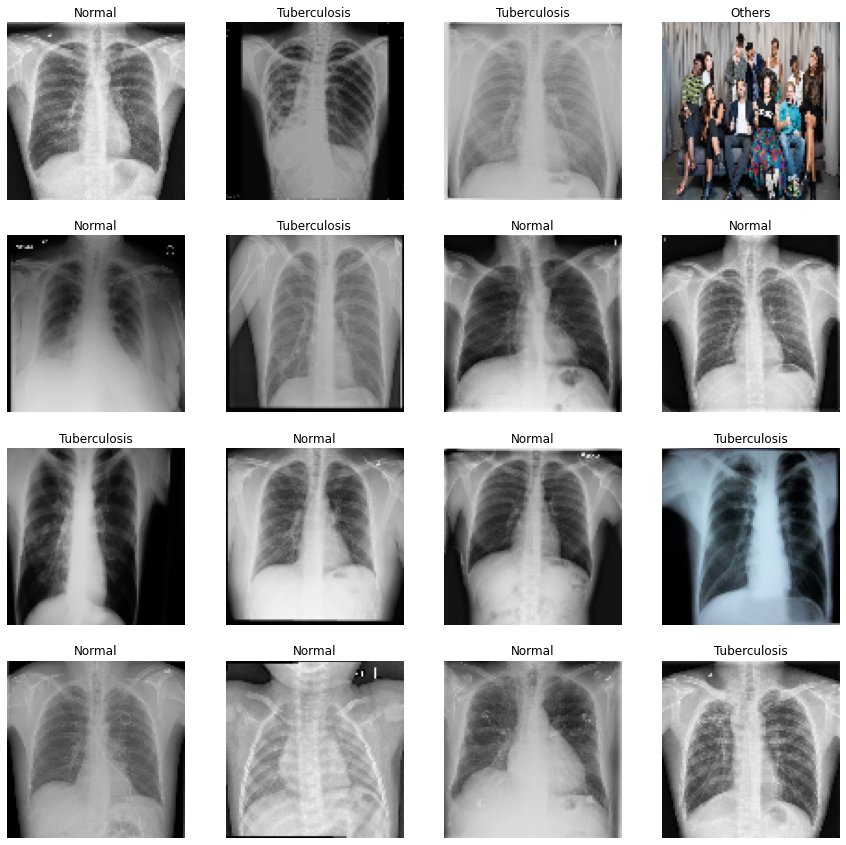

In [ ]:
# Data Visualization
class_names=["Normal","Others","Tuberculosis",]
plt.figure(figsize=(15,15))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

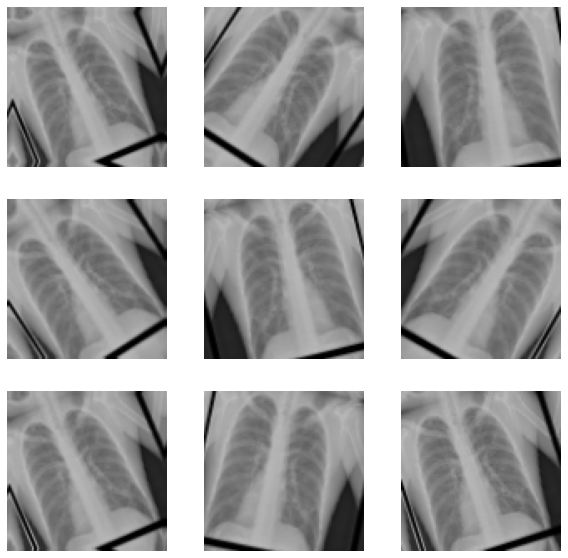

In [ ]:
# visualization of Augmented data
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
from keras.backend import relu
# Developing a model
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='softmax')
])

In [ ]:
# Compile and Training the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 96, 96, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                  

In [ ]:
epochs=25
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs
)

Epoch 1/25
83/83 [==============================] - 258s 3s/step - loss: 0.7867 - accuracy: 0.5890 - val_loss: 0.4369 - val_accuracy: 0.8770
Epoch 2/25
83/83 [==============================] - 58s 655ms/step - loss: 0.5108 - accuracy: 0.7352 - val_loss: 0.3043 - val_accuracy: 0.8835
Epoch 3/25
83/83 [==============================] - 59s 666ms/step - loss: 0.4667 - accuracy: 0.7648 - val_loss: 0.3542 - val_accuracy: 0.8706
Epoch 4/25
83/83 [==============================] - 57s 648ms/step - loss: 0.4014 - accuracy: 0.8059 - val_loss: 0.2585 - val_accuracy: 0.8900
Epoch 5/25
83/83 [==============================] - 57s 647ms/step - loss: 0.3855 - accuracy: 0.8166 - val_loss: 0.1878 - val_accuracy: 0.9482
Epoch 6/25
83/83 [==============================] - 58s 652ms/step - loss: 0.3713 - accuracy: 0.8364 - val_loss: 0.2360 - val_accuracy: 0.9191
Epoch 7/25
83/83 [==============================] - 61s 689ms/step - loss: 0.3996 - accuracy: 0.8181 - val_loss: 0.2816 - val_accuracy: 0.8932
E

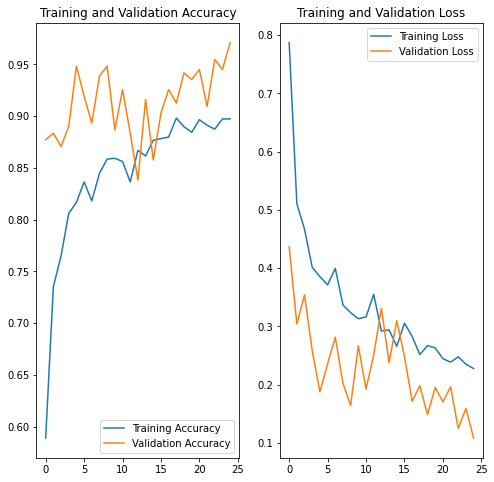

In [ ]:
# Visualizing the Training and Validation Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Validating the model usin test data
model.evaluate(test_ds)

7/7 [==============================] - 13s 50ms/step - loss: 0.1443 - accuracy: 0.9817


[0.1443014293909073, 0.9816513657569885]

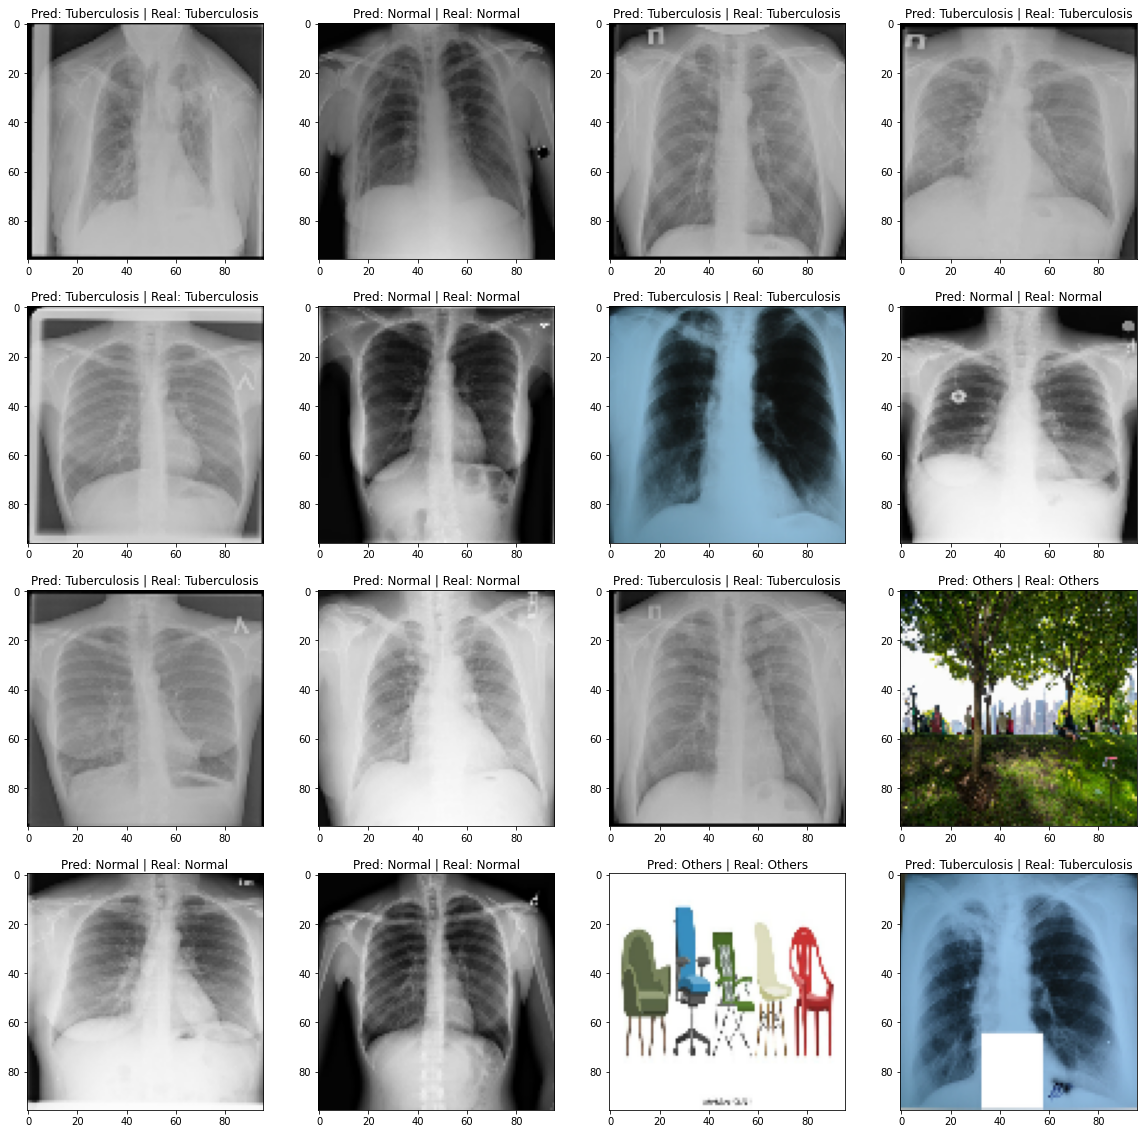

In [ ]:
import numpy

plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
#saving model weights
Model=model.save_weights('Model.h5')

json_string = model.to_json() #save our model as json
with open('model.json','w') as json_file:
  json_file.write(json_string)

In [23]:
import numpy as np
import cv2
from keras.models import model_from_json


class ModelBuild:
    def __init__(self):
        self.img = None
        self.model = self.make_model()

    def make_model(self):
        file = open("model-1.json", 'r')
        loaded_model_json = file.read()
        file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights("Model.h5")
        return model


    def preprocess_image2(self, image):
        self.img = cv2.imread(str(image))
        self.img = cv2.resize(self.img, (96, 96))
        self.img = self.img / 255
        return self.img.reshape(-1, 96, 96, 3)

    def predict(self, features):
        pred = self.model(features)
        return float(pred[0][0]), float(pred[0][1]), float(pred[0][2])
        



In [25]:
model = ModelBuild()
features = model.preprocess_image2('Normal-5.png')
prediction = model.predict(features)
prediction

(3.749491429875279e-18, 2.9475215796992416e-06, 0.9999970197677612)